In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
print(train.shape,test.shape)

(42000, 785) (28000, 784)


In [4]:
train.head()
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [5]:
print(X.isnull().any().sum())
print(test.isnull().any().sum())


0
0


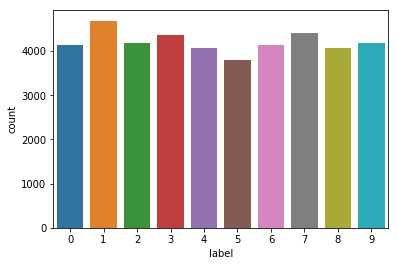

In [6]:
sns.countplot(y)

In [7]:
X=X/255
test=test/255

In [8]:
X=X.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)


In [9]:
y=to_categorical(y)

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


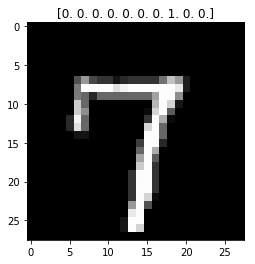

In [10]:
plt.title(y[6])
plt.imshow(X[6][:,:,0],cmap='gray')


In [11]:
random_seed=2
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=random_seed)

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1),padding='Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',padding='Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs = 10,batch_size=50, validation_data = (X_val,y_val),verbose=True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 44s 1ms/step - loss: 0.5865 - accuracy: 0.8050 - val_loss: 0.1105 - val_accuracy: 0.9681
Epoch 2/10
37800/37800 [==============================] - 44s 1ms/step - loss: 0.1459 - accuracy: 0.9584 - val_loss: 0.0862 - val_accuracy: 0.9779
Epoch 3/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.1047 - accuracy: 0.9712 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 4/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0876 - accuracy: 0.9756 - val_loss: 0.0502 - val_accuracy: 0.9862
Epoch 5/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0755 - accuracy: 0.9795 - val_loss: 0.0452 - val_accuracy: 0.9883
Epoch 6/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0709 - accuracy: 0.9805 - val_loss: 0.0411 - val_accuracy: 0.9898
Epoch 7/10
37800/37800 [==============================] - 43s 1ms/ste

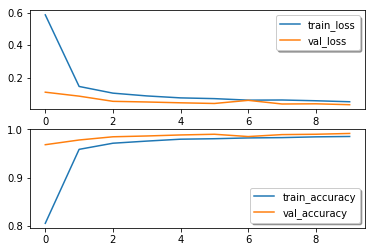

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'],label='train_accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [14]:
pred=model.predict(test)
pred = np.argmax(pred,axis = 1)
pred=pd.DataFrame({'ImageId':np.arange(1,28001),'Label':pred})
export_csv = pred.to_csv ('submission_digit1.csv', index = None, header=True)

